In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from IPython.core.display import display, HTML
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import zscore
import numpy as np
import pandas as pd
display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import shapely
import category_encoders as ce

In [2]:
# **1. Explore the dataset for anomalies and missing values and take corrective actions if necessary.**
data = pd.read_csv('talking_data.csv')

In [3]:
data.head(30)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0


In [4]:
data.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [5]:
data.isnull().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [6]:
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [7]:
# **2. Which column has maximum number of unique values present among all the available columns?**
data.click_time.unique
data.ip.unique
data.app.unique   
data.device.unique
data.os.unique
data.channel.unique   # 497
# channel column has the maximum bumber of unique values

<bound method Series.unique of 0        497
1        259
2        212
3        477
4        178
        ... 
99995    122
99996    244
99997     19
99998    245
99999    401
Name: channel, Length: 100000, dtype: int64>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [9]:
data.click_time

0        2017-11-07 09:30:38
1        2017-11-07 13:40:27
2        2017-11-07 18:05:24
3        2017-11-07 04:58:08
4        2017-11-09 09:00:09
                ...         
99995    2017-11-09 13:25:41
99996    2017-11-07 11:25:43
99997    2017-11-08 11:38:42
99998    2017-11-08 17:55:21
99999    2017-11-07 14:32:27
Name: click_time, Length: 100000, dtype: object

In [10]:
# **3. Use an appropriate technique to get rid of all the apps that are very rare 
# (say which comprise of less than 20% clicks) and plot the rest..** 
# # NONE of the apps are contributing to more than 20 %

In [11]:
data['app'].value_counts()
# WE USE THIS LINE ABOVE TO COUNT
# THERES NOTHING WITH 20,000 OR MORE VALUES THAT REPEATS ITSELF

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
551        1
168        1
105        1
233        1
190        1
Name: app, Length: 161, dtype: int64

In [12]:
# ************************************      4    ***************************** 
# By using Pandas derive new features such as - 
# 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as float/int datatypes using the 'click_time' column .
# Add the newly derived columns in original dataset.**

In [13]:
data.click_time

0        2017-11-07 09:30:38
1        2017-11-07 13:40:27
2        2017-11-07 18:05:24
3        2017-11-07 04:58:08
4        2017-11-09 09:00:09
                ...         
99995    2017-11-09 13:25:41
99996    2017-11-07 11:25:43
99997    2017-11-08 11:38:42
99998    2017-11-08 17:55:21
99999    2017-11-07 14:32:27
Name: click_time, Length: 100000, dtype: object

In [14]:
# data1 = pd.DataFrame(data.row.str.split(' ',1).tolist(),columns = ['DATE','TIME'])
new = data["click_time"].str.split(" ", n = 1, expand = True)

# making separate first name column from new data frame
data["DATE"]= new[0]
  
# making separate last name column from new data frame
data["TIME"]= new[1]

In [15]:
data


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,DATE,TIME
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,2017-11-07,09:30:38
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,2017-11-07,13:40:27
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,2017-11-07,18:05:24
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2017-11-07,04:58:08
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,2017-11-09,09:00:09
...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,2017-11-09,13:25:41
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,2017-11-07,11:25:43
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,2017-11-08,11:38:42
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,2017-11-08,17:55:21


In [16]:
# import pandas as pd
  
  
# date = pd.date_range('2010-12-30', '2010-12-30',
#                      freq='D').to_series()
# a=date.dt.dayofweek

# a==3


In [17]:
# data["DATE"].dayofweek()

In [18]:
from datetime import datetime

# DAY_OF_WEEK = []
# for i in data['DATE']:
    
# #     date = pd.date_range(i, i,freq='D').to_series()
# #     a = date.dt.dayofweek
# #     DAY_OF_WEEK[a]

#     date = datetime.strptime(i,'%Y-%m-%d')
#     DAY_OF_WEEK.append(date.weekday())
#     #print(date.weekday())
# #print(DAY_OF_WEEK)

In [19]:
# print(DAY_OF_WEEK[0])

In [20]:
# days = {0:'Monday', 1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday', 5:'Saturday', 6 : 'Sunday'}
# out = []
# for i in DAY_OF_WEEK:
#     out.append(days[i])

In [21]:
data['DATE'][0]

'2017-11-07'

In [22]:
from datetime import datetime
data['DATE'].dtypes
date = datetime.strptime(data['DATE'][0],'%Y-%m-%d')
data['DATE'].dtypes
date

datetime.datetime(2017, 11, 7, 0, 0)

In [23]:
# data['DayOfWeek'] = out
# data['DATE'] = data['DATE'].astype('str')
# data['DATE'].dtypes

In [24]:
data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,DATE,TIME
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,2017-11-07,09:30:38
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,2017-11-07,13:40:27
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,2017-11-07,18:05:24
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2017-11-07,04:58:08
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,2017-11-09,09:00:09
...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,2017-11-09,13:25:41
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,2017-11-07,11:25:43
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,2017-11-08,11:38:42
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,2017-11-08,17:55:21


In [25]:
from datetime import datetime
Day_Of_Week = []
days = {0:'Monday', 1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday', 5:'Saturday', 6 : 'Sunday'}
dayNumber = []
for i  in data['DATE']:
    date = datetime.strptime(i,'%Y-%m-%d')
    Day_Of_Week.append(date.weekday())
   
print(Day_Of_Week[0])
data['Day_Of_Week'] = Day_Of_Week
for i in Day_Of_Week:
    dayNumber.append(days[i])
data['WeekDay'] = dayNumber
data

1


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,DATE,TIME,Day_Of_Week,WeekDay
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,2017-11-07,09:30:38,1,Tuesday
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,2017-11-07,13:40:27,1,Tuesday
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,2017-11-07,18:05:24,1,Tuesday
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2017-11-07,04:58:08,1,Tuesday
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,2017-11-09,09:00:09,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,2017-11-09,13:25:41,3,Thursday
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,2017-11-07,11:25:43,1,Tuesday
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,2017-11-08,11:38:42,2,Wednesday
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,2017-11-08,17:55:21,2,Wednesday


In [26]:
period = pd.Period("2015-10-23", freq='M')
period.day_of_year

# period = pd.Period("2012-12-31", freq='D')
# period.day_of_year

# period = pd.Period("2013-01-01", freq='D')
# period.day_of_year

304

In [27]:
from datetime import datetime
Day_Of_Year = []
# days = {0:'Monday', 1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday', 5:'Saturday', 6 : 'Sunday'}
dayNumber = []
for i in data['DATE']:
    DayCount = pd.Period(i, freq='D')
    Day_Of_Year.append(DayCount.day_of_year)
print(Day_Of_Year[0])
for i in Day_Of_Year:
    dayNumber.append(Day_Of_Year[i])
data['DayOfTheYear'] = dayNumber
data

311


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,DATE,TIME,Day_Of_Week,WeekDay,DayOfTheYear
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,2017-11-07,09:30:38,1,Tuesday,312
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,2017-11-07,13:40:27,1,Tuesday,312
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,2017-11-07,18:05:24,1,Tuesday,312
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2017-11-07,04:58:08,1,Tuesday,312
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,2017-11-09,09:00:09,3,Thursday,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,2017-11-09,13:25:41,3,Thursday,313
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,2017-11-07,11:25:43,1,Tuesday,312
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,2017-11-08,11:38:42,2,Wednesday,312
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,2017-11-08,17:55:21,2,Wednesday,312


In [28]:
data['month'] = pd.DatetimeIndex(data['DATE']).month
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,DATE,TIME,Day_Of_Week,WeekDay,DayOfTheYear,month
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,2017-11-07,09:30:38,1,Tuesday,312,11
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,2017-11-07,13:40:27,1,Tuesday,312,11
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,2017-11-07,18:05:24,1,Tuesday,312,11
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2017-11-07,04:58:08,1,Tuesday,312,11
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,2017-11-09,09:00:09,3,Thursday,313,11


In [29]:
data['month'] = pd.DatetimeIndex(data['DATE']).day
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,DATE,TIME,Day_Of_Week,WeekDay,DayOfTheYear,month
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,2017-11-07,09:30:38,1,Tuesday,312,7
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,2017-11-07,13:40:27,1,Tuesday,312,7
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,2017-11-07,18:05:24,1,Tuesday,312,7
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2017-11-07,04:58:08,1,Tuesday,312,7
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,2017-11-09,09:00:09,3,Thursday,313,9


In [30]:
# data.drop('DayOWEEK', axis=1, inplace=True)
# data.drop('DayOfWEEK', axis=1, inplace=True)
data

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,DATE,TIME,Day_Of_Week,WeekDay,DayOfTheYear,month
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,2017-11-07,09:30:38,1,Tuesday,312,7
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,2017-11-07,13:40:27,1,Tuesday,312,7
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,2017-11-07,18:05:24,1,Tuesday,312,7
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2017-11-07,04:58:08,1,Tuesday,312,7
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,2017-11-09,09:00:09,3,Thursday,313,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0,2017-11-09,13:25:41,3,Thursday,313,9
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0,2017-11-07,11:25:43,1,Tuesday,312,7
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0,2017-11-08,11:38:42,2,Wednesday,312,8
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0,2017-11-08,17:55:21,2,Wednesday,312,8


In [31]:
data['Hour'] = pd.DatetimeIndex(data['TIME']).hour

data.drop('attributed_time', axis=1, inplace=True)
data.head()

,ip,app,device,os,channel,click_time,is_attributed,DATE,TIME,Day_Of_Week,WeekDay,DayOfTheYear,month,Hour
0,87540,12,1,13,497,2017-11-07 09:30:38,0,2017-11-07,09:30:38,1,Tuesday,312,7,9
1,105560,25,1,17,259,2017-11-07 13:40:27,0,2017-11-07,13:40:27,1,Tuesday,312,7,13
2,101424,12,1,19,212,2017-11-07 18:05:24,0,2017-11-07,18:05:24,1,Tuesday,312,7,18
3,94584,13,1,13,477,2017-11-07 04:58:08,0,2017-11-07,04:58:08,1,Tuesday,312,7,4
4,68413,12,1,1,178,2017-11-09 09:00:09,0,2017-11-09,09:00:09,3,Thursday,313,9,9


In [32]:
# data['is_attributed'] = data['is_Attributed']
data
# data.drop('is_Attributed', axis = 1, inplace=True)
# click_time	DATE	TIME
data.drop('click_time', axis = 1, inplace=True)
data.drop('DATE', axis = 1, inplace=True)
data.drop('TIME', axis = 1, inplace=True)
data.drop('WeekDay', axis = 1, inplace=True)
data

,ip,app,device,os,channel,is_attributed,Day_Of_Week,DayOfTheYear,month,Hour
0,87540,12,1,13,497,0,1,312,7,9
1,105560,25,1,17,259,0,1,312,7,13
2,101424,12,1,19,212,0,1,312,7,18
3,94584,13,1,13,477,0,1,312,7,4
4,68413,12,1,1,178,0,3,313,9,9
...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,0,3,313,9,13
99996,85150,9,1,13,244,0,1,312,7,11
99997,18839,3,1,13,19,0,2,312,8,11
99998,114276,15,1,12,245,0,2,312,8,17


In [33]:
# **5. Divide the data into training and testing subsets into 80:20 
#     ratio(Train_data = 80% , Testing_data = 20%) and
#      check the average download rates('is_attributed') 
#         for train and test data, scores should be comparable.**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn import metrics
from sklearn import preprocessing

x = data.drop('is_attributed', axis=1)
y = data['is_attributed']

# SPLIT

x_train, x_test, y_train, y_test =  train_test_split(x, y , test_size=0.2, random_state=10)

In [35]:
# y_train.is_attributed.mean
y_train.mean()

0.00235

In [36]:
y_test.mean()

0.00195

In [37]:
data

,ip,app,device,os,channel,is_attributed,Day_Of_Week,DayOfTheYear,month,Hour
0,87540,12,1,13,497,0,1,312,7,9
1,105560,25,1,17,259,0,1,312,7,13
2,101424,12,1,19,212,0,1,312,7,18
3,94584,13,1,13,477,0,1,312,7,4
4,68413,12,1,1,178,0,3,313,9,9
...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,0,3,313,9,13
99996,85150,9,1,13,244,0,1,312,7,11
99997,18839,3,1,13,19,0,2,312,8,11
99998,114276,15,1,12,245,0,2,312,8,17


In [38]:
# *****************************************    6      ************************
#  Apply XGBoostClassifier with default parameters on training data
# and make first 10 prediction for Test data.
# NOTE: Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC.** 

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=10, learning_rate=0.05)
gbcl = gbcl.fit(x_train, y_train)
test_pred = gbcl.predict(x_test)
gbcl_score = gbcl.score(x_test, y_test)
print("SCORE FOR BOOST CLASSIFIER IS: {}".format(gbcl_score))
print(metrics.confusion_matrix(y_test, test_pred))

SCORE FOR BOOST CLASSIFIER IS: 0.9978
[[19956     5]
 [   39     0]]


In [40]:
y_test[0:10]

33226    0
64804    0
39763    0
51270    0
9698     0
5948     0
27955    0
55001    0
50875    0
47755    0
Name: is_attributed, dtype: int64

In [41]:
test_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01)
# tree_params = {'n_estimators':[10,20,30,40,50], 'learning_rate': [0.0005, 0.001,0.0001,1e-4, 1e-3]}
# grid_tree = GridSearchCV(model, tree_params, cv=5, scoring="roc_auc", return_train_score=True)
gbcl = gbcl.fit(x_train, y_train)
test_pred = gbcl.predict(x_test)
gbcl_score = gbcl.score(x_test, y_test)
print("SCORE FOR BOOST CLASSIFIER IS: {}".format(gbcl_score))
print(metrics.confusion_matrix(y_test, test_pred))

SCORE FOR BOOST CLASSIFIER IS: 0.99805
[[19961     0]
 [   39     0]]


In [43]:
#  Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC.** 
test_pred = gbcl.predict_proba(x_test)
test_pred[0:10]

array([[0.99780206, 0.00219794],
       [0.99780206, 0.00219794],
       [0.99780206, 0.00219794],
       [0.99780206, 0.00219794],
       [0.99780206, 0.00219794],
       [0.99780206, 0.00219794],
       [0.9973279 , 0.0026721 ],
       [0.99780206, 0.00219794],
       [0.99780206, 0.00219794],
       [0.99780206, 0.00219794]])

In [44]:
from sklearn.metrics import roc_auc_score
# DEFAULT PARAMETERS
# roc_auc_score(y_test, test_pred)
# **7. On evaluating the predictions made by the model what is the AUC/ROC score with default hyperparameters.**

roc_auc_score(y_test, test_pred[:,1])

0.8620656433892243

In [45]:
test_pred[:].shape

(20000, 2)

In [46]:
print(test_pred[:5])

[[0.99780206 0.00219794]
 [0.99780206 0.00219794]
 [0.99780206 0.00219794]
 [0.99780206 0.00219794]
 [0.99780206 0.00219794]]


In [47]:
from sklearn.model_selection import GridSearchCV
gcbl = GradientBoostingClassifier()
tree_params = {'n_estimators':[10,20,30,40,50], 'learning_rate': [0.0005, 0.001,0.0001,1e-4, 1e-3]}
grid_tree = GridSearchCV(gcbl, tree_params, cv=5, scoring="roc_auc", return_train_score=True)
grid_tree.fit(x_train, y_train)
# in this part we use Grid Tree structure but with Gradient boost arguments

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.0005, 0.001, 0.0001, 0.0001,
                                           0.001],
                         'n_estimators': [10, 20, 30, 40, 50]},
             return_train_score=True, scoring='roc_auc')

In [48]:
# list(map(int, (np.linspace(1, 100, num=100))))

In [49]:
from sklearn.model_selection import GridSearchCV   # REDO
gcbl = GradientBoostingClassifier()
tree_params = {'n_estimators':[10,20,30,40,50,60,70,80,90,100], 'learning_rate': [0.0005, 0.001,0.0001,1e-4, 1e-3]}
grid_tree = GridSearchCV(gcbl, tree_params, cv=5, scoring="roc_auc", return_train_score=True)
grid_tree.fit(x_train, y_train)
# in this part we use Grid Tree structure but with Gradient boost arguments

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.0005, 0.001, 0.0001, 0.0001,
                                           0.001],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc')

In [50]:
grid_tree.best_score_  # HYPERPARAMETERS

0.8280291619146908

In [51]:
# from sklearn.model_selection import GridSearchCV
# tree_params = {'criterion':['gini', 'entropy'], 'max_depth': list(range(1,6,1)),
#               'min_samples_leaf': list(range(1,7,1))}
# grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=1), tree_params, cv=3)
# grid_tree.fit(train_x, train_y)

In [52]:
grid_tree.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [53]:
# grid_tree.gs

In [54]:
grid_tree.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [55]:
# **8. Compute feature importance score and name the top 5 features/columns .**


In [56]:
# conda install -c anaconda py-xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Lenovo\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.13.0-py38haa244f~ --> anaconda::conda-4.13.0-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [57]:
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from xgboost import plot_tree

In [58]:
from xgboost import XGBClassifier

In [59]:
# plot_importance(gbcl)
# pyplot.show()
# plot_tree(gbcl._Booster)

In [60]:
# **8. Compute feature importance score and name the top 5 features columns .**
# # 
# **9. Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.

In [61]:
# from sklearn.ensemble import 
from sklearn.linear_model import LogisticRegression

bcl = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, max_samples=0.7,  bootstrap=True) # bootstrap repeats the samples
# tree_params = {'n_estimators':[10,20,30,40,50], 'learning_rate': [0.0005, 0.001,0.0001,1e-4, 1e-3]}
# grid_tree = GridSearchCV(model, tree_params, cv=5, scoring="roc_auc", return_train_score=True)
bcl = bcl.fit(x_train, y_train)
test_pred = bcl.predict(x_test)
bcl_score = bcl.score(x_test, y_test)
print("SCORE FOR BAGGING CLASSIFIER IS: {}".format(bcl_score))
print(metrics.confusion_matrix(y_test, test_pred))

SCORE FOR BAGGING CLASSIFIER IS: 0.998
[[19960     1]
 [   39     0]]


In [62]:
data['is_attributed'].value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [63]:
from imblearn.over_sampling import SMOTE

In [64]:
sm = SMOTE()
x_train_s, y_train_s = sm.fit_resample(x_train,y_train.ravel()) # first we balance the train data set and then
x_test_s, y_test_s = sm.fit_resample(x_test,y_test.ravel())    # we balance the test data set

<AxesSubplot:ylabel='count'>

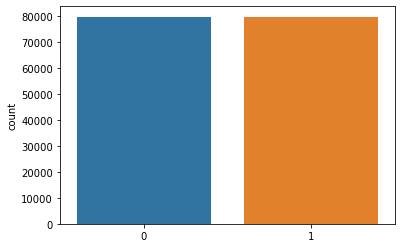

In [65]:
sns.countplot(y_train_s)

<AxesSubplot:ylabel='count'>

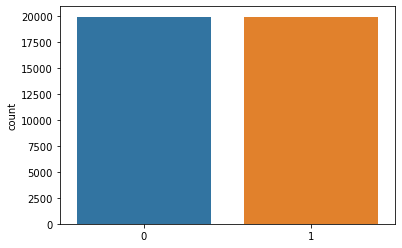

In [66]:
sns.countplot(y_test_s)

In [67]:
# y_test_s.unique

In [68]:
y_test_s

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [69]:
print(y_test_s)

[0 0 0 ... 1 1 1]


In [70]:
np.count_nonzero(y_test_s == 0)

19961

In [71]:
np.count_nonzero(y_test_s == 1)

19961

In [74]:

# **9. Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.
# TRAIN THE MODEL AFTER RESAMPLIING    SMOTE
# model = LogisticRegression(verbose=1)
# model.fit(x_train_s, y_train_s)
# # from sklearn.ensemble import 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
bcl = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, max_samples=0.7,  bootstrap=True) # bootstrap repeats the samples
# tree_params = {'n_estimators':[10,20,30,40,50], 'learning_rate': [0.0005, 0.001,0.0001,1e-4, 1e-3]}
# grid_tree = GridSearchCV(model, tree_params, cv=5, scoring="roc_auc", return_train_score=True)
bcl = bcl.fit(x_train_s, y_train_s)
test_pred = bcl.predict(x_test_s)
bcl_score = bcl.score(x_test_s, y_test_s)
print("SCORE FOR BAGGING CLASSIFIER IS: {}".format(bcl_score))
print(metrics.confusion_matrix(y_test_s, test_pred))
print(metrics.classification_report(y_test_s,test_pred))
roc = metrics.roc_auc_score(y_test_s,test_pred) #[:,1])
print(roc)

SCORE FOR BAGGING CLASSIFIER IS: 0.7944491758929914
[[16608  3353]
 [ 4853 15108]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     19961
           1       0.82      0.76      0.79     19961

    accuracy                           0.79     39922
   macro avg       0.80      0.79      0.79     39922
weighted avg       0.80      0.79      0.79     39922

0.7944491758929912


In [73]:
print(test_pred)

[0 0 0 ... 1 1 0]


In [ ]:
# **10. On the basis of AUC/ROC score which one will you choose from 
# BaggingClassifier and XGBoostClassifier and              
# why?What does AUC/ROC score signifies?

In [ ]:
y_pred = bcl.predict_proba(x_test_s)
roc_auc = metrics.roc_auc_score(y_test_s,y_pred[:,1])
print(roc_auc)

# BAGGING IS MORE RELIABLE

In [ ]:
# roc = metrics.mean_squared_error(y_test_s,y_pred[:,1])
# roc

In [ ]:
# **11.  What is the accuracy for BaggingClassifier and XGBoostClassifier?()
bcl_score = bcl.score(x_test_s, y_test_s)
print(bcl_score)

In [ ]:
gbcl_score = gbcl.score(x_test_s, y_test_s)
print(gbcl_score)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=10, learning_rate=0.01)
# tree_params = {'n_estimators':[10,20,30,40,50], 'learning_rate': [0.0005, 0.001,0.0001,1e-4, 1e-3]}
# grid_tree = GridSearchCV(model, tree_params, cv=5, scoring="roc_auc", return_train_score=True)
gbcl = gbcl.fit(x_train, y_train)
test_pred = gbcl.predict(x_test)
gbcl_score = gbcl.score(x_test, y_test)
print("SCORE FOR BOOST CLASSIFIER IS: {}".format(gbcl_score))
print(metrics.confusion_matrix(y_test, test_pred))

sm = SMOTE()
x_train_sgb, y_train_sgb = sm.fit_resample(x_train,y_train.ravel()) # first we balance the train data set and then
x_test_sgb, y_test_sgb = sm.fit_resample(x_test,y_test.ravel())    # we balance the test data set

In [ ]:
np.count_nonzero(y_test_sgb == 0)

In [ ]:
np.count_nonzero(y_test_sgb == 1)

In [ ]:
gbcl = GradientBoostingClassifier(n_estimators=100, learning_rate=0.001) # bootstrap repeats the samples
# tree_params = {'n_estimators':[10,20,30,40,50], 'learning_rate': [0.0005, 0.001,0.0001,1e-4, 1e-3]}
# grid_tree = GridSearchCV(model, tree_params, cv=5, scoring="roc_auc", return_train_score=True)
gbcl = gbcl.fit(x_train_sgb, y_train_sgb)
test_pred_proba = gbcl.predict_proba(x_test_sgb)  # this outputs 2 cols as the value and the probability of the value
test_pred = gbcl.predict(x_test_sgb)  ### this out puts 1 column as a a value
gbcl_score = gbcl.score(x_test_sgb, y_test_sgb)
print("SCORE FOR BAGGING CLASSIFIER IS: {}".format(gbcl_score))
print(metrics.confusion_matrix(y_test_sgb, test_pred))
print(metrics.classification_report(y_test_sgb,test_pred))
roc_auc = metrics.roc_auc_score(y_test_sgb,test_pred_proba[:,1])  # 
print(roc_auc)



# from sklearn.ensemble import GradientBoostingClassifier
# gbcl = GradientBoostingClassifier(n_estimators=10, learning_rate=0.001)
# # tree_params = {'n_estimators':[10,20,30,40,50], 'learning_rate': [0.0005, 0.001,0.0001,1e-4, 1e-3]}
# # grid_tree = GridSearchCV(model, tree_params, cv=5, scoring="roc_auc", return_train_score=True)
# gbcl = gbcl.fit(x_train_, y_train)
# test_pred = gbcl.predict(x_test)
# gbcl_score = gbcl.score(x_test, y_test)
# print("SCORE FOR BOOST CLASSIFIER IS: {}".format(gbcl_score))
# print(metrics.confusion_matrix(y_test, test_pred))

In [ ]:
gbcl_sm_score = gbcl.score(x_test_sgb, y_test_sgb)
print(gbcl_score)